In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

Erro médio absoluto = 16.752463384574312 %


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


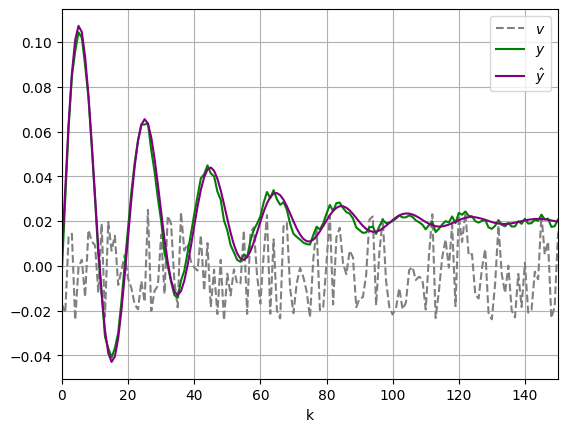

In [2]:
# Função de Transferência do sistema
wn = 10
Hs = ctrl.tf([1, 2], [1, 2, wn**2])
h = 0.1/np.sqrt(wn)
Hz = ctrl.c2d(Hs, h)

# Espaço de Estados do sistema
sys = ctrl.tf2ss(Hz.num[0][0], Hz.den[0][0])
A = sys.A
B = sys.B
H = sys.C
D = sys.D

# Número de pontos
N = 310

# Parâmetros do filtro
Q = 0.5*np.eye(2)
R = 0.5
I = np.eye(2)
G = np.eye(2)

# Sinal de controle
uk = 1

# Condição inicial
xh = np.array([[0], [0]])
P = np.eye(2) * 1000

# Amostras
time = np.linspace(0, 10, N)
k_ = np.arange(0, N, 1)

# Sinal gerado
t, y = ctrl.step_response(Hs, T=time)

# Saída com ruído
v = (np.random.rand(N)-0.5)*0.05
y_r = y + 0.1*v

# Vetor do sinal estimado
yh = np.zeros(N)

# Algoritmo
for k in range(N):
    
    # Predição
    xh = A@xh + B*uk
    P = A@P@A.T + G@Q@G.T
    
    # Correção
    K = P@H.T @ np.linalg.inv(H@P@H.T+R)
    xh = xh + K*(y_r[k] - H@xh)
    P = P - K@H@P
    
    # Saída
    yh[k] = H@xh

# Erro
erro = np.mean(np.abs((y_r-yh)/(y_r))*100)
print("Erro médio absoluto =", erro, "%")

# Gráfico
plt.figure()
plt.plot(k_, v, 'gray', label='$v$',linestyle='--')
plt.plot(k_, y_r, 'g', label='$y$')
plt.plot(k_, yh, 'purple', label='$\hat{y}$')
plt.xlim([0,150])
plt.xlabel('k')
plt.legend()
plt.grid()

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


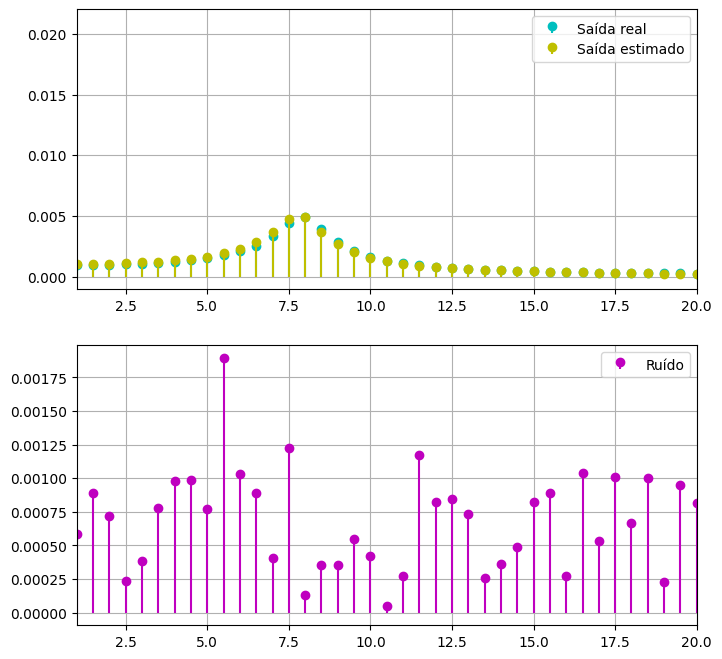

In [3]:
# Espectro de frequência do sinal gerado, recuperado e de ruído

N = len(t)
Ts = 1/N
Fs = 1/Ts

FFT = np.fft.fft(y)
freqs = np.fft.fftfreq(N, 2/Fs)

FFT = FFT[:len(FFT)//2]
freqs = freqs[:len(freqs)//2]

magnitude = np.abs(FFT)/Fs

FFT_2 = np.fft.fft(v)
FFT_2 = FFT_2[:len(FFT_2)//2]
magnitude_2 = np.abs(FFT_2)/Fs

FFT_3 = np.fft.fft(yh)
FFT_3 = FFT_3[:len(FFT_3)//2]
magnitude_3 = np.abs(FFT_3)/Fs

plt.figure(figsize=(8, 8))

plt.subplot(2,1,1)
plt.stem(freqs, magnitude, linefmt='c-', markerfmt='co', basefmt='none', label='Saída real')
plt.stem(freqs, magnitude_3, linefmt='y-', markerfmt='yo', basefmt='none', label='Saída estimado')
plt.legend()
plt.xlim([1,20])
plt.grid()

plt.subplot(2,1,2)
plt.stem(freqs, magnitude_2, linefmt='m-', markerfmt='mo', basefmt='none', label='Ruído')
plt.legend()
plt.xlim([1,20])
plt.grid()

plt.show()